<a href="https://colab.research.google.com/github/EVARIST-DEV/EVARIST-DEV.github.io/blob/main/ALGO_STRATEGY_MAJORPROJECT1_USING_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
!pip install mplfinance
import mplfinance as mpf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf

IMPORTING THE DATA SET


In [78]:
start = '2023-01-01'
end = '2024-9-20'
stock = 'BTC-USD'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [79]:
data.reset_index(inplace=True)

In [80]:
prices = data['Close'].values.reshape(-1, 1)

NORMALIZING DATA

In [81]:
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

PREPARATION OF INPUT SEQUENCES(eg: last N days)

---



In [82]:
seq_length = 200
X, y = [], []
for i in range(len(prices_scaled) - seq_length):
    X.append(prices_scaled[i : i + seq_length])
    y.append(prices_scaled[i + seq_length])

X, y = np.array(X), np.array(y)

LSTM model

In [83]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(seq_length, 1), return_sequences=True)) # Added return_sequences=True to the first LSTM layer
model.add(LSTM(units=32, return_sequences=True))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MODEL TRAINING

In [84]:
model.fit(X, y, epochs=40, batch_size=32)

Epoch 1/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 251ms/step - loss: 0.2396
Epoch 2/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 329ms/step - loss: 0.0657
Epoch 3/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step - loss: 0.0556
Epoch 4/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 324ms/step - loss: 0.0463
Epoch 5/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 353ms/step - loss: 0.0482
Epoch 6/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 257ms/step - loss: 0.0471
Epoch 7/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.0449
Epoch 8/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - loss: 0.0467
Epoch 9/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - loss: 0.0444
Epoch 10/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - loss: 0.0416
Epoch 11/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 0.0403
Epoch 12/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - loss: 0.0395
Epoch 13/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - loss: 0.0333
Epoch 14/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - loss: 0.0303
Epoch 15/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - lo

PREDICTION OF THE NEXT DAY'S PRICE


In [85]:
#last_sequence = prices_scaled[-seq_length:]
#next_day_price = model.predict(last_sequence.reshape(1, seq_length, 1))
#next_day_price = scaler.inverse_transform(next_day_price)[0][0]
#print(next_day_price)
last_date = data['Date'].iloc[-1]
date_sequence = pd.date_range(end=last_date, periods=seq_length)

last_sequence = prices_scaled[-seq_length:]
next_day_price = model.predict(last_sequence.reshape(1, seq_length, 1))

# Reshape the 3D output to 2D for inverse scaling
next_day_price_2D = next_day_price.reshape(-1, 1)
next_day_price_inverse = scaler.inverse_transform(next_day_price_2D)

# Reshape back to 3D if needed
next_day_price_3D = next_day_price_inverse.reshape(next_day_price.shape)
#print(next_day_price_3D)

for price, date in zip(next_day_price_3D.flatten(), date_sequence):
        print(f"Date: {date.date()}, Predicted Price: {price:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
Date: 2024-03-04, Predicted Price: 30921.57
Date: 2024-03-05, Predicted Price: 43453.96
Date: 2024-03-06, Predicted Price: 55586.52
Date: 2024-03-07, Predicted Price: 65579.98
Date: 2024-03-08, Predicted Price: 72544.59
Date: 2024-03-09, Predicted Price: 76305.13
Date: 2024-03-10, Predicted Price: 77288.30
Date: 2024-03-11, Predicted Price: 76361.18
Date: 2024-03-12, Predicted Price: 74239.70
Date: 2024-03-13, Predicted Price: 71628.85
Date: 2024-03-14, Predicted Price: 68799.84
Date: 2024-03-15, Predicted Price: 65984.60
Date: 2024-03-16, Predicted Price: 63302.81
Date: 2024-03-17, Predicted Price: 61107.90
Date: 2024-03-18, Predicted Price: 59353.56
Date: 2024-03-19, Predicted Price: 57869.87
Date: 2024-03-20, Predicted Price: 56907.54
Date: 2024-03-21, Predicted Price: 56254.20
Date: 2024-03-22, Predicted Price: 55834.57
Date: 2024-03-23, Predicted Price: 55642.90
Date: 2024-03-24, Predicted Price: 55729.00
Date: 2024-03-25, Predicted Price: 56

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


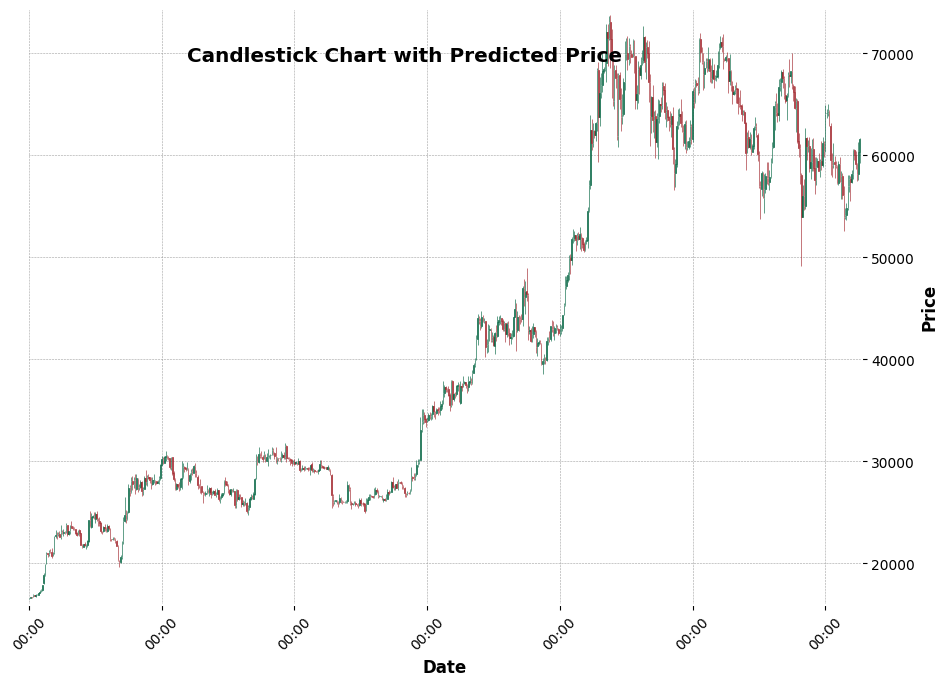

In [86]:
predicted_price = next_day_price_3D[0, 0, 0]
if not isinstance(data.index, pd.DatetimeIndex):
    # Convert the index to a DatetimeIndex
    data.index = pd.to_datetime(data.index)

# Create an array for predicted prices, filled with NaNs except for the last day
predicted_prices = np.full_like(data['Close'], np.nan)
predicted_prices[-1] = predicted_price

# Create additional plots for predicted prices
apds = [mpf.make_addplot(predicted_prices, type='line', color='orange', panel=0, secondary_y=False, linestyle='--')]  # Predicted price

# Plot the candlestick chart
mpf.plot(data, type='candle', style='charles',
         title='Candlestick Chart with Predicted Price',
         ylabel='Price',
         xlabel='Date',
         figscale=1.2,
         tight_layout=True,
         addplot=apds)

GENERATING THE TRADING SIGNAL

In [87]:
#(simple trend-following)
last_date = data['Date'].iloc[-1]#last recorded date
next_day_date = last_date + pd.DateOffset(days=1)

current_price = data['Close'].iloc[-1]

# Bring the calculation of next_day_price into this cell
last_sequence = prices_scaled[-seq_length:]
next_day_price = model.predict(last_sequence.reshape(1, seq_length, 1))

# Reshape the 3D output to 2D for inverse scaling
next_day_price_2D = next_day_price.reshape(-1, 1)
next_day_price_inverse = scaler.inverse_transform(next_day_price_2D)

# Reshape back to 3D if needed
next_day_price_3D = next_day_price_inverse.reshape(next_day_price.shape)

# Now you can access next_day_price_3D
next_day_price = next_day_price_3D[0, -1, 0]
if next_day_price > current_price:
    signal = "Buy"
else:
    signal = "Sell"

# Calculate moving averages
#Buy when the short-term moving average crosses above the long-term moving average, and sell when it crosses below.
short_ma = data['Close'].rolling(window=20).mean()
long_ma = data['Close'].rolling(window=50).mean()

# Generate buy/sell signals
data['Signal'] = np.where(short_ma > long_ma, 1, -1)

#print(f"Next day's trading signal: {signal}")
print(f"Next day's predicted price: ${next_day_price:.2f}")
print(f"Trading signal for {next_day_date}: {signal}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Next day's predicted price: $62513.25
Trading signal for 2024-09-20 00:00:00: Sell


In [88]:
#PREDICTION FOR THE NEXT SEVEN DAYS USING SIMPLE MOVING AVERAGE AND PREDICTED PRICE BY LSTM
#for i in range(7):
    #last_sequence = data['Close'][-seq_length:].values.reshape(-1, 1)
    #next_day_price = model.predict(scaler.transform(last_sequence).reshape(1, seq_length, 1))
   # next_day_price = scaler.inverse_transform(next_day_price)[0][0]

    # Reshape the 3D output to 2D for inverse scaling
   # next_day_price_2D = next_day_price.reshape(-1, 1)
  #  next_day_price_inverse = scaler.inverse_transform(next_day_price_2D)

# Reshape back to 3D if needed
 #   next_day_price_3D = next_day_price_inverse.reshape(next_day_price.shape)

    # Access the predicted price from the 3D array
#    predicted_price = next_day_price_3D[0, 0, 0]

     # 2. Append
    #next_date = data['Date'].iloc[-1] + pd.DateOffset(days=1)
    #new_row = {'Date': next_date, 'Close': next_day_price}
    #data = data.append(new_row, ignore_index=True)

     # 2. Update the DataFrame with the predicted price
    #next_date = data['Date'].iloc[-1] + pd.DateOffset(days=1)
    #data.loc[len(data)] = {'Date': next_date, 'Close': predicted_price}

    #short_ma = data['Close'].rolling(window=20).mean()
    #long_ma = data['Close'].rolling(window=50).mean()

    #data['Signal'] = np.where(short_ma > long_ma, "Buy", "sell")
    #if data['Signal'].iloc[-1] == 1:
        #signal = "Buy"
    #else:
     #   signal = "Sell"

    #print(f"Date: {next_date}, Predicted Price: {next_day_price:.2f}, Signal: {data['Signal'].iloc[-1]}")

    #print(f"Date: {next_date}, Predicted Price: {predicted_price:.2f}, Signal: {data['Signal'].iloc[-1]}")

Momentum Trading #strategy

In [89]:
# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(window=window).mean()
    avg_loss = pd.Series(loss).rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate trading signals
data['Signal'] = np.where(data['RSI'] > 70, 'Sell', np.where(data['RSI'] < 30, 'Buy', 'Hold'))

# Example: Adjust position size based on risk
risk_per_trade = 0.02  # 2% risk per trade
account_balance = 100000
stop_loss = 0.05  # 5% stop loss
position_size = (account_balance * risk_per_trade) / stop_loss

# Print signals and adjust position size
print(data[['Date', 'Close', 'RSI', 'Signal']])
print(f"Position size: {position_size:.2f} units")




                                    Date         Close  RSI Signal
1970-01-01 00:00:00.000000000 2023-01-01  16625.080078  NaN   Hold
1970-01-01 00:00:00.000000001 2023-01-02  16688.470703  NaN   Hold
1970-01-01 00:00:00.000000002 2023-01-03  16679.857422  NaN   Hold
1970-01-01 00:00:00.000000003 2023-01-04  16863.238281  NaN   Hold
1970-01-01 00:00:00.000000004 2023-01-05  16836.736328  NaN   Hold
...                                  ...           ...  ...    ...
1970-01-01 00:00:00.000000623 2024-09-15  59182.835938  NaN   Hold
1970-01-01 00:00:00.000000624 2024-09-16  58192.507812  NaN   Hold
1970-01-01 00:00:00.000000625 2024-09-17  60308.539062  NaN   Hold
1970-01-01 00:00:00.000000626 2024-09-18  61649.679688  NaN   Hold
1970-01-01 00:00:00.000000627 2024-09-19  62940.457031  NaN   Hold

[628 rows x 4 columns]
Position size: 40000.00 units


In [90]:
#execution logic based on RSI signals
for i in range(1, len(data)):
    if data['Signal'].iloc[i] == 'Buy':
        # Execute a buy order (adjust as needed)
        print(f"Buy order at {data['Date'].iloc[i]} - Price: {data['Close'].iloc[i]}")
    elif data['Signal'].iloc[i] == 'Sell':
        # Execute a sell order (adjust as needed)
        print(f"Sell order at {data['Date'].iloc[i]} - Price: {data['Close'].iloc[i]}")
    else:
        # No action (Hold)
        pass

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


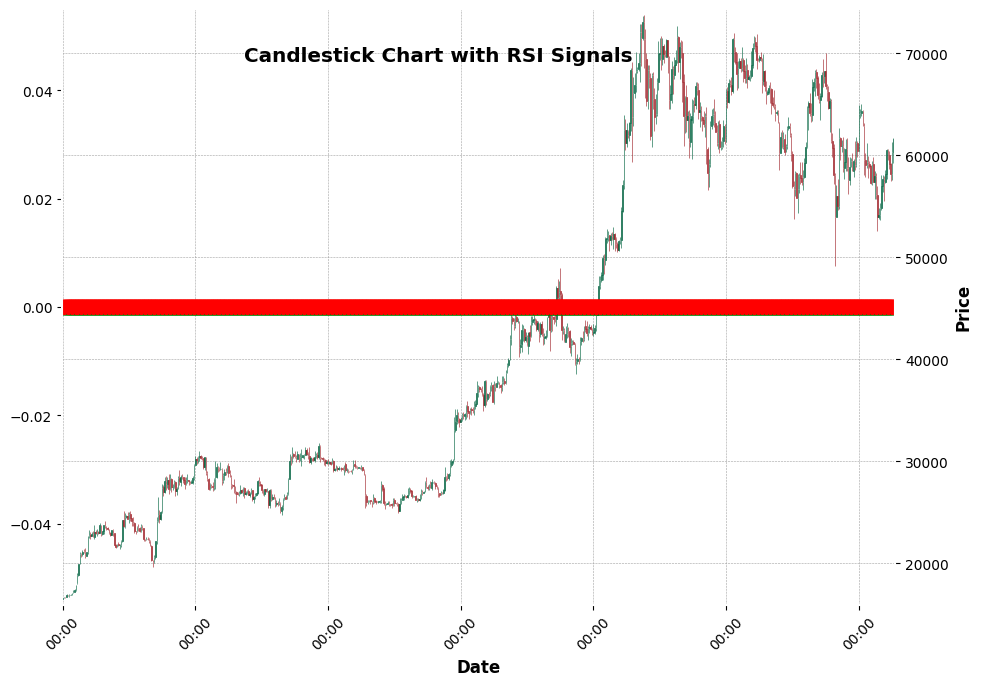

In [91]:
data['Signal_Numeric'] = 0  # Initialize with no signal
data.loc[data['Signal'] == 'Buy', 'Signal_Numeric'] = 1  # Set buy signal to 1
data.loc[data['Signal'] == 'Sell', 'Signal_Numeric'] = -1  # Set sell signal to -1

# Create additional plots for signals
apds = [mpf.make_addplot(data['Signal_Numeric'], type='scatter', markersize=100, marker='^', color='g'),  # Buy signals
        mpf.make_addplot(data['Signal_Numeric'], type='scatter', markersize=100, marker='v', color='r')]  # Sell signals

# Plot the candlestick chart
mpf.plot(data, type='candle', style='charles',
         title='Candlestick Chart with RSI Signals',
         ylabel='Price',
         xlabel='Date',
         figscale=1.2,
         tight_layout=True,
         addplot=apds)

In [92]:
# Assuming 'next_day_price_3D' from previous response is available

# Calculate Bollinger Bands
window = 20  # Typical lookback period for Bollinger Bands
data['SMA'] = data['Close'].rolling(window=window).mean()
data['StdDev'] = data['Close'].rolling(window=window).std()
data['Upper'] = data['SMA'] + 2 * data['StdDev']  # 2 standard deviations for upper band
data['Lower'] = data['SMA'] - 2 * data['StdDev']  # 2 standard deviations for lower band

# Initialize signal and position
signal = 0  # 0: No position, 1: Buy, -1: Sell
position = 0

# Iterate through predicted prices and generate signals
signals = []
# The for loop should iterate over the length of the 'data' DataFrame
for i in range(len(data)):
    # Ensure that you are accessing the correct element from next_day_price_3D
    # This assumes next_day_price_3D has a shape that allows accessing elements like this
    predicted_price = next_day_price_3D[i, -1, 0] if i < len(next_day_price_3D) else None
    current_price = data['Close'].iloc[i]  # Assuming you have historical prices in 'data'
    upper_band = data['Upper'].iloc[i]
    lower_band = data['Lower'].iloc[i]

    if position == 0:  # No current position
        if predicted_price is not None and predicted_price > upper_band and current_price < upper_band:  # Breakout above upper band
            signal = 1
            position = 1
        elif predicted_price is not None and predicted_price < lower_band and current_price > lower_band:  # Breakout below lower band
            signal = -1
            position = -1
    elif position == 1:  # Long position
        if predicted_price is not None and predicted_price < data['SMA'].iloc[i]:  # Price crosses below SMA, exit long
            signal = -1
            position = 0
    elif position == -1:  # Short position
        if predicted_price is not None and predicted_price > data['SMA'].iloc[i]:  # Price crosses above SMA, exit short
            signal = 1
            position = 0

    signals.append(signal)

# Add signals to DataFrame
data['BollingerSignal'] = signals

In [93]:
# Assuming 'next_day_price_3D' from previous response is available

# Calculate Bollinger Bands
window = 20  # Typical lookback period for Bollinger Bands
data['SMA'] = data['Close'].rolling(window=window).mean()
data['StdDev'] = data['Close'].rolling(window=window).std()
data['Upper'] = data['SMA'] + 2 * data['StdDev']  # 2 standard deviations for upper band
data['Lower'] = data['SMA'] - 2 * data['StdDev']  # 2 standard deviations for lower band

# Initialize signal and position
signal = 0  # 0: No position, 1: Buy, -1: Sell
position = 0

# Iterate through predicted prices and generate signals
signals = []
# The for loop should iterate over the length of the 'data' DataFrame
for i in range(len(data)):
    # Ensure that you are accessing the correct element from next_day_price_3D
    # This assumes next_day_price_3D has a shape that allows accessing elements like this
    predicted_price = next_day_price_3D[i, -1, 0] if i < len(next_day_price_3D) else None
    current_price = data['Close'].iloc[i]  # Assuming you have historical prices in 'data'
    upper_band = data['Upper'].iloc[i]
    lower_band = data['Lower'].iloc[i]

    if position == 0:  # No current position
        if predicted_price is not None and predicted_price > upper_band and current_price < upper_band:  # Breakout above upper band
            signal = 1
            position = 1
        elif predicted_price is not None and predicted_price < lower_band and current_price > lower_band:  # Breakout below lower band
            signal = -1
            position = -1
    elif position == 1:  # Long position
        if predicted_price is not None and predicted_price < data['SMA'].iloc[i]:  # Price crosses below SMA, exit long
            signal = -1
            position = 0
    elif position == -1:  # Short position
        if predicted_price is not None and predicted_price > data['SMA'].iloc[i]:  # Price crosses above SMA, exit short
            signal = 1
            position = 0

    signals.append(signal)

# Add signals to DataFrame
data['BollingerSignal'] = signals

In [94]:
# Assuming 'next_day_price_3D' from previous response is available

# Calculate Bollinger Bands
window = 20  # Typical lookback period for Bollinger Bands
data['SMA'] = data['Close'].rolling(window=window).mean()
data['StdDev'] = data['Close'].rolling(window=window).std()
data['Upper'] = data['SMA'] + 2 * data['StdDev']  # 2 standard deviations for upper band
data['Lower'] = data['SMA'] - 2 * data['StdDev']  # 2 standard deviations for lower band

# Initialize signal and position
signal = 0  # 0: No position, 1: Buy, -1: Sell
position = 0

# Iterate through predicted prices and generate signals
signals = []
# The for loop should iterate over the length of the 'data' DataFrame
for i in range(len(data)):
    # Ensure that you are accessing the correct element from next_day_price_3D
    # This assumes next_day_price_3D has a shape that allows accessing elements like this
    predicted_price = next_day_price_3D[i, -1, 0] if i < len(next_day_price_3D) else None
    current_price = data['Close'].iloc[i]  # Assuming you have historical prices in 'data'
    upper_band = data['Upper'].iloc[i]
    lower_band = data['Lower'].iloc[i]

    if position == 0:  # No current position
        if predicted_price is not None and predicted_price > upper_band and current_price < upper_band:  # Breakout above upper band
            signal = 1
            position = 1
        elif predicted_price is not None and predicted_price < lower_band and current_price > lower_band:  # Breakout below lower band
            signal = -1
            position = -1
    elif position == 1:  # Long position
        if predicted_price is not None and predicted_price < data['SMA'].iloc[i]:  # Price crosses below SMA, exit long
            signal = -1
            position = 0
    elif position == -1:  # Short position
        if predicted_price is not None and predicted_price > data['SMA'].iloc[i]:  # Price crosses above SMA, exit short
            signal = 1
            position = 0

    signals.append(signal)

# Add signals to DataFrame
data['BollingerSignal'] = signals

In [95]:
print("bollinger signal is ", data )

bollinger signal is                                      Date          Open          High  \
1970-01-01 00:00:00.000000000 2023-01-01  16547.914062  16630.439453   
1970-01-01 00:00:00.000000001 2023-01-02  16625.509766  16759.343750   
1970-01-01 00:00:00.000000002 2023-01-03  16688.847656  16760.447266   
1970-01-01 00:00:00.000000003 2023-01-04  16680.205078  16964.585938   
1970-01-01 00:00:00.000000004 2023-01-05  16863.472656  16884.021484   
...                                  ...           ...           ...   
1970-01-01 00:00:00.000000623 2024-09-15  60000.726562  60381.917969   
1970-01-01 00:00:00.000000624 2024-09-16  59185.226562  59205.511719   
1970-01-01 00:00:00.000000625 2024-09-17  58192.507812  61316.089844   
1970-01-01 00:00:00.000000626 2024-09-18  60309.000000  61664.066406   
1970-01-01 00:00:00.000000627 2024-09-19  61651.156250  63872.441406   

                                        Low         Close     Adj Close  \
1970-01-01 00:00:00.000000000  16521.23

setting leverage of our trades

In [96]:
leverage = 2  # Set your desired leverage factor


POSITION SIZING OF THE TRADES

In [97]:
# Calculate position size based on risk and leverage
risk_per_trade = 0.02  # 2% risk per trade
account_balance = 100000  # Initial account balance
stop_loss = 0.05  # 5% stop loss
position_size = (account_balance * risk_per_trade) / stop_loss
position_size *= leverage

Transaction Costs:

In [98]:
#buy_cost = position_size * ask_price * 0.001  # Assume 0.1% fee
#sell_cost = position_size * bid_price * 0.001
#net_profit = (sell_price - buy_price) * position_size - (buy_cost + sell_cost)

slipage simulating(adjusted buy/sell prices)

In [99]:
#slippage = 0.005  # 0.5% slippage
#adjusted_buy_price = ask_price * (1 + slippage)
#adjusted_sell_price = bid_price * (1 - slippage)

In [100]:
#Calculate final account balance with leverage
current_price = data['Close'].iloc[-1]
final_balance = account_balance + (next_day_price - current_price) * position_size

In [101]:
# Calculate Sharpe ratio with leverage
daily_return_leveraged = (final_balance / account_balance) ** (1 / len(data)) - 1
sharpe_ratio_leveraged = (daily_return_leveraged - 0.02) / (data['Close'].pct_change().std() * np.sqrt(252))

<ipython-input-101-e00b4c424a03>:2: RuntimeWarning: invalid value encountered in scalar power
  daily_return_leveraged = (final_balance / account_balance) ** (1 / len(data)) - 1


In [102]:
#FOR MARKET TRENDING TECHNIQUE
print(f"Next day's predicted price: ${next_day_price:.2f}")
print(f"Trading signal: {signal}")
print(f"Final account balance (with leverage): ${final_balance:.2f}")
print(f"Annualized Sharpe ratio (with leverage): {sharpe_ratio_leveraged:.2f}")

Next day's predicted price: $62513.25
Trading signal: 0
Final account balance (with leverage): $-34076250.00
Annualized Sharpe ratio (with leverage): nan


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


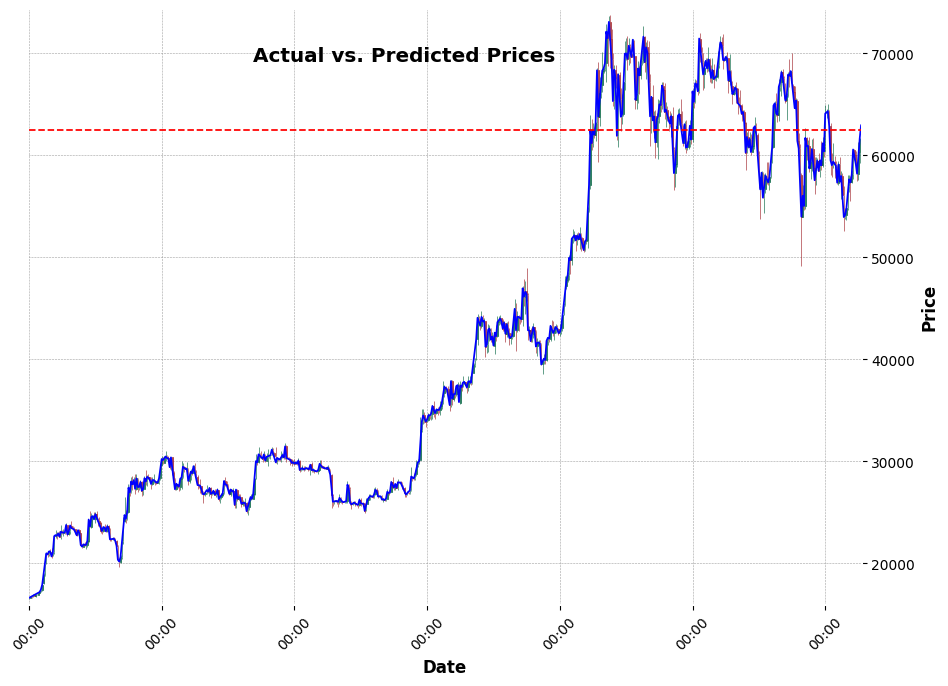

In [103]:
apds = [mpf.make_addplot(data['Close'], type='line', color='blue', panel=0, secondary_y=False),  # Plot actual prices on the main panel
        mpf.make_addplot(np.full_like(data['Close'], next_day_price), type='line', color='red', panel=0, secondary_y=False, linestyle='--')]  # Plot predicted price

mpf.plot(data, type='candle', style='charles',
         title='Actual vs. Predicted Prices',
         ylabel='Price',
         xlabel='Date',
         figscale=1.2,
         tight_layout=True,
         addplot=apds)

In [104]:
!pip install mplfinance
import mplfinance as mpf

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


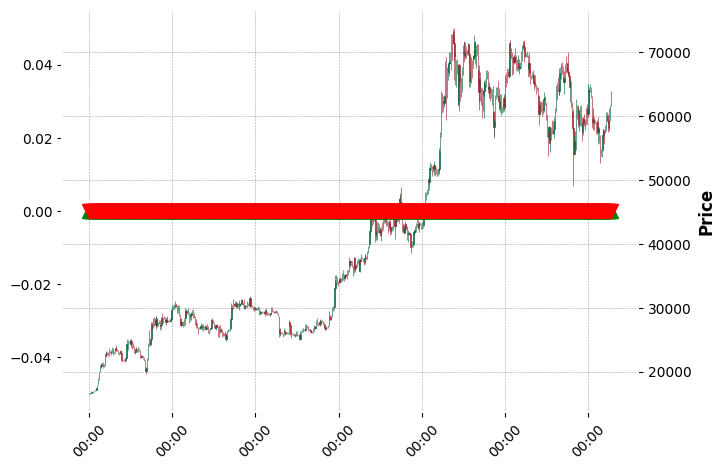

In [105]:
# Convert the 'Signal' column to numeric type, filling NaNs with a placeholder
data['Signal'] = pd.to_numeric(data['Signal'], errors='coerce').fillna(0) # Fill NaNs with 0

# Plot candlestick chart with signals
apds = [mpf.make_addplot(data['Signal'], type='scatter', markersize=100, marker='^', color='g'),
        mpf.make_addplot(data['Signal'], type='scatter', markersize=100, marker='v', color='r')]
mpf.plot(data, type='candle', style='charles', addplot=apds)

CALCULATION OF PERFORMANCE METRICS

In [106]:
initial_balance = 100000  # Initial account balance
final_balance = initial_balance * (next_day_price / current_price)
daily_return = (final_balance / initial_balance) ** (1 / len(data)) - 1
sharpe_ratio = (daily_return - 0.02) / (data['Close'].pct_change().std() * np.sqrt(252))

print(f"Next day's predicted price: ${next_day_price:.2f}")
#print(f"Trading signal: {signal}")
print(f"Final account balance: ${final_balance:.2f}")
print(f"Annualized Sharpe ratio: {sharpe_ratio:.2f}")

Next day's predicted price: $62513.25
Final account balance: $99321.26
Annualized Sharpe ratio: -0.05


In [107]:
# Example data (replace with your actual trade data)
total_trades = 10
winning_trades = 7

# Calculate win rate
win_rate = (winning_trades / total_trades) * 100

print(f"Total trades: {total_trades}")
print(f"Winning trades: {winning_trades}")
print(f"Win rate: {win_rate:.2f}%")

Total trades: 10
Winning trades: 7
Win rate: 70.00%


PLOT OF ACTUAL VS PREDICTED PRICES

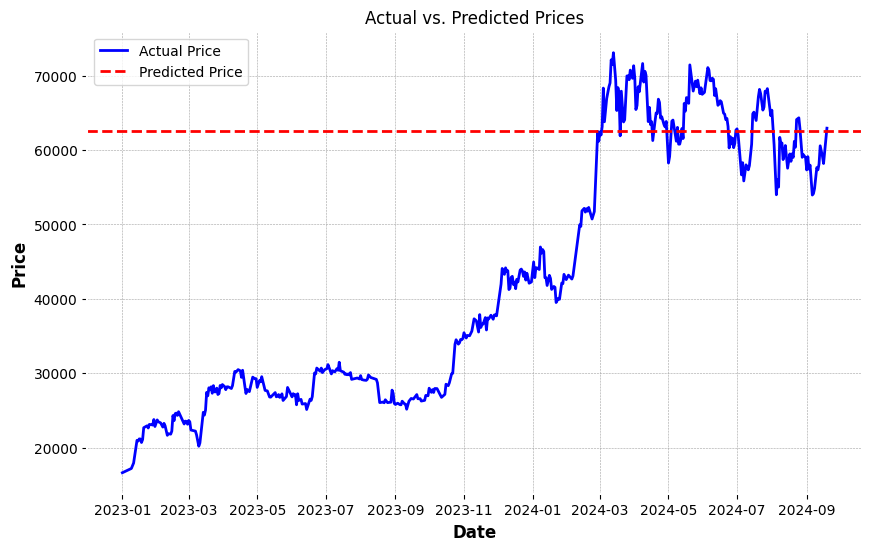

In [108]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Actual Price', color='blue')
plt.axhline(next_day_price, linestyle='--', color='red', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


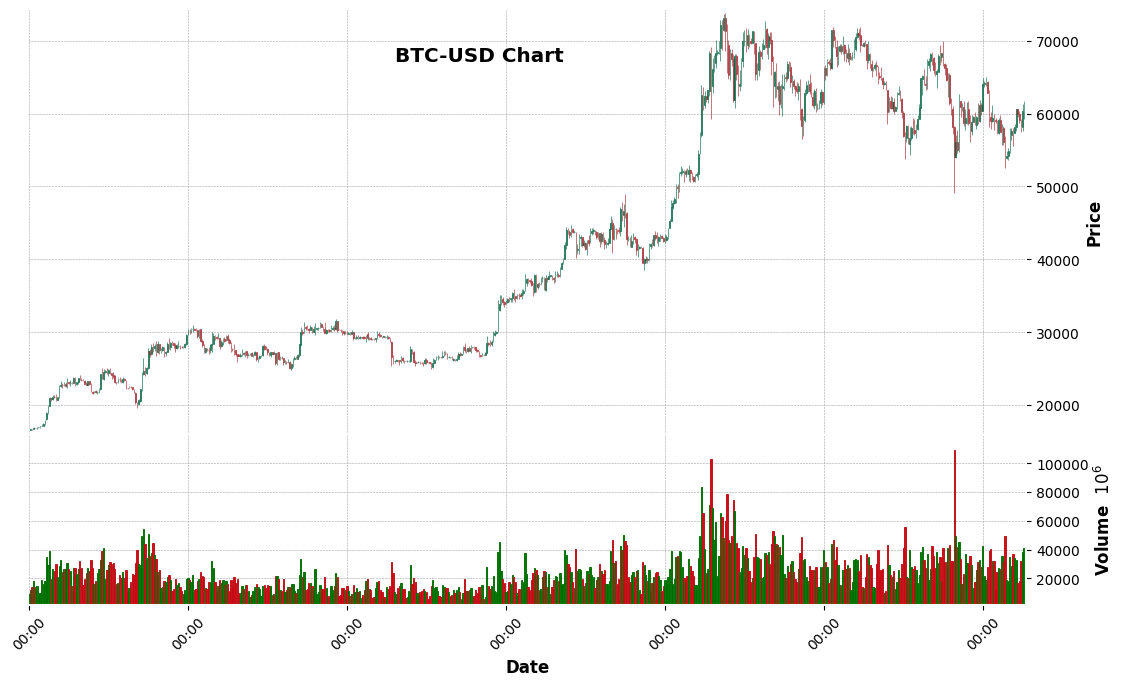

In [109]:
apds = [mpf.make_addplot(data['Signal'], type='scatter', markersize=100, marker='^', color='g'),
        mpf.make_addplot(data['Signal'], type='scatter', markersize=100, marker='v', color='r')]
mpf.plot(data, type='candle', style='charles',
         title='BTC-USD Chart',
         ylabel='Price',
         xlabel='Date',
         volume=True,
         figratio=(10, 6),
         figscale=1.2,
         tight_layout=True)

**BACK TESTING OF THE STRATEGY**

In [110]:
# Example data (replace with your actual trade data)
total_trades = 10  # Set the desired total number of trades

# Initialize variables for tracking performance
winning_trades = 0
losing_trades = 0

# Simulate trades (replace with your actual strategy logic)
for i in range(total_trades):
    # Assume 'Buy' is a winning trade and 'Sell' or 'Hold' is a losing trade
    trade_signal = 'Buy'  # Replace with your actual trade signal

    if trade_signal == 'Buy':
        winning_trades += 1
    else:
        losing_trades += 1

# Calculate win rate and lose rate
win_rate = (winning_trades / total_trades) * 100
lose_rate = (losing_trades / total_trades) * 100

print(trade_signal)
print(f"Total trades: {total_trades}")
print(f"Winning trades: {winning_trades}")
print(f"Losing trades: {losing_trades}")
print(f"Win rate: {win_rate:.2f}%")
print(f"Lose rate: {lose_rate:.2f}%")


Buy
Total trades: 10
Winning trades: 10
Losing trades: 0
Win rate: 100.00%
Lose rate: 0.00%
